# 01-img-explore.ipynb

## Import packages

In [1]:
# Standard library imports
from pathlib import Path
import sys
# Third party imports
import imageio as iio
import matplotlib.pyplot as plt
import napari
import numpy as np
import skimage
# Local imports
%load_ext autoreload
%autoreload 2
module_path = str(Path.cwd().parent)
if module_path not in sys.path:
    sys.path.append(module_path)
import glitchpy as glitch

# Load image

## Open napari window

In [2]:
viewer = napari.Viewer()

## Load raw image from file

In [3]:
img_path = Path(
    r"C:\Users\cgusb\Pictures\druid_arch_rocks.png"
)
if not img_path.exists():
    print(f'Image not found: {img_path}')
else:
    img = iio.imread(img_path)
    print(f'{img.shape=}')
    print(f'{img.dtype=}')
    viewer.add_image(img)

img.shape=(657, 876, 3)
img.dtype=dtype('uint8')


## Convert to 8-bit HSV and test conversion back to HSV

This shows that converting an HSV image converted from floating point to 8-bit can be converted back to RGB without converting back to floating point first.

In [4]:
img_hsv = skimage.color.rgb2hsv(img)
img_hsv = skimage.util.img_as_ubyte(img_hsv)
print(f'{img_hsv.shape=}')
print(f'{img_hsv.dtype=}')
viewer.add_image(img_hsv)


img_hsv.shape=(657, 876, 3)
img_hsv.dtype=dtype('uint8')


<Image layer 'img_hsv' at 0x1eabd861a90>

In [5]:
img_rgb = skimage.color.hsv2rgb(img_hsv)
print(f'{img_rgb.shape=}')
print(f'{img_rgb.dtype=}')
viewer.add_image(img_rgb)

img_rgb.shape=(657, 876, 3)
img_rgb.dtype=dtype('float64')


<Image layer 'img_rgb' at 0x1eac162c520>

# Reduce number of hues

## Plot HSV channels

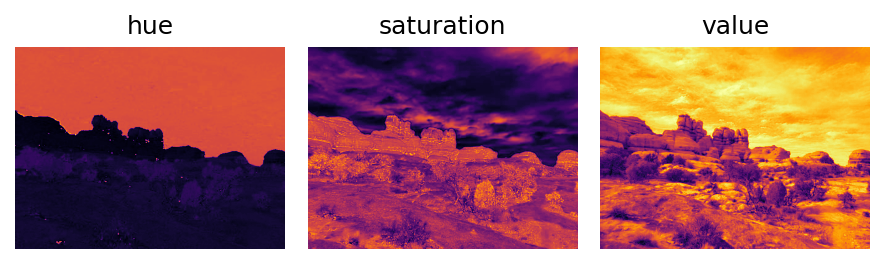

In [6]:
fig, ax = glitch.plot_channels(img_hsv, dpi=150, tight_layout=True)
plt.show()

## View image with hue only

(saturation and value all the way up) 

In [17]:
img_hue = img_hsv.copy()
img_hue[:, :, 1] = 255
img_hue[:, :, 2] = 255
img_hue = skimage.color.hsv2rgb(img_hue)
viewer.add_image(img_hue)

<Image layer 'img_hue' at 0x1eac353aaf0>

## Plot HSV histogram

Hue: [85]


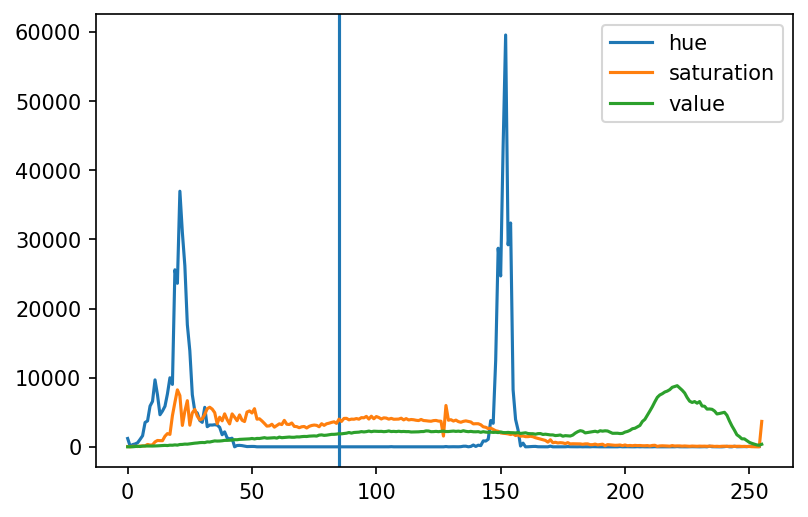

In [8]:
fig, ax = glitch.plot_hists(img_hsv, n_multiotsu=[2, 0, 0], dpi=150)
plt.show()

In [9]:
img_2hue = img_hsv.copy()
viewer.add_image(img_2hue)

<Image layer 'img_2hue' at 0x1eac4041af0>